## Support Vector Classifier Implementation 

In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.9 kB 1.3 MB/s eta 0:00:01
     --------------------- ----------------- 92.2/165.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.2 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.1/7.8 MB 6.4 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.8 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/7.8 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.8 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.8 MB 5.0 MB/s eta 0:00:02
   ---------- -------------------------

In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 



In [34]:
## Creating synthetic datapoint 
from sklearn.datasets import make_classification


In [56]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0
)


In [57]:
X

array([[-1.70557477, -0.72911475],
       [-0.76864806,  0.93207591],
       [-1.54041785, -0.54875477],
       ...,
       [-1.81447125,  2.15920502],
       [-0.46914127,  0.19773805],
       [-0.47168157, -0.6896677 ]])

In [59]:
pd.DataFrame(X)[0]

0     -1.705575
1     -0.768648
2     -1.540418
3     -1.642189
4     -0.754250
         ...   
995   -0.276057
996   -1.756871
997   -1.814471
998   -0.469141
999   -0.471682
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

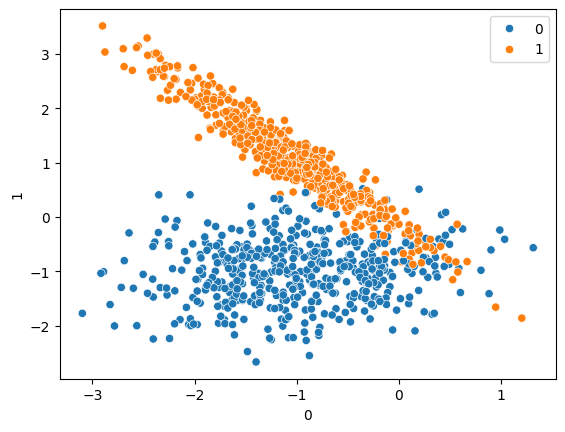

In [60]:
import seaborn as sns
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [62]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')


In [63]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [64]:
y_pred = svc.predict(X_test)

In [65]:
print(y_test)

[0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1]


In [66]:
from sklearn.metrics import classification_report,confusion_matrix


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       134
           1       0.93      0.97      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [69]:
print("Confustion Matrix",confusion_matrix(y_test,y_pred))

Confustion Matrix [[126   8]
 [  4 112]]


<Axes: >

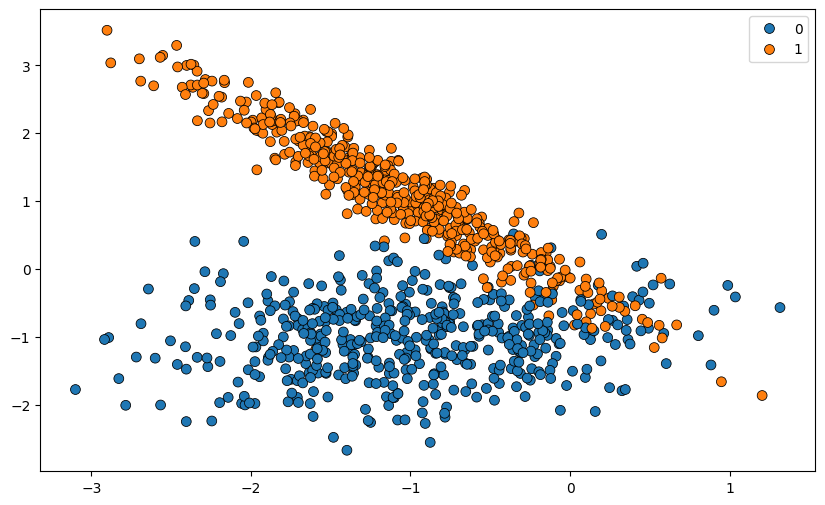

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = X[:,0],y =X[:,1],hue=y,edgecolor='k',s =50)

In [72]:
# Getting the coefficients and intercept of the decision boundary
coef = svc.coef_[0]
intercept = svc.intercept_[0]
print(coef)
print(intercept)

[1.60665073 2.62683706]
1.2657103704257582


In [75]:
# Calculating the slope and intercept for the decision boundary
slop = -coef[0]/coef[1]
intercept = intercept /coef[1]
print(slop)
print(coef)

-0.6116293825394327
[1.60665073 2.62683706]


In [76]:
# Creating a range of values for x
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

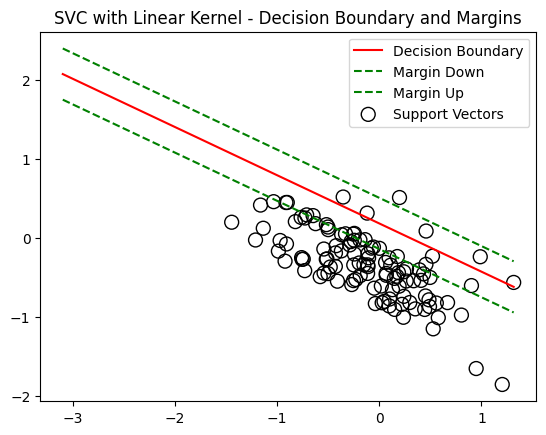

Equation of the decision boundary: 1.61 * x0 + 2.63 * x1 + 1.27 = 0


In [80]:
# Decision boundary
decision_boundary = slop * x_range + intercept
plt.plot(x_range, decision_boundary, 'r', label='Decision Boundary')
# Margins (parallel lines to the decision boundary)
margin = 1 / np.sqrt(np.sum(coef ** 2))
decision_boundary_down = decision_boundary - margin
decision_boundary_up = decision_boundary + margin

plt.plot(x_range, decision_boundary_down, 'g--', label='Margin Down')
plt.plot(x_range, decision_boundary_up, 'g--', label='Margin Up')

# Highlight the support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, 
            facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.title('SVC with Linear Kernel - Decision Boundary and Margins')
plt.show()

# Print the equation of the decision boundary
print(f"Equation of the decision boundary: {coef[0]:.2f} * x0 + {coef[1]:.2f} * x1 + {svc.intercept_[0]:.2f} = 0")

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)
print(accuracy_score)

0.952


In [83]:
rbf = SVC(kernel = 'rbf')

In [85]:
rbf.fit(X_train,y_train)

SVC()

In [86]:
y_pred = rbf.predict(X_test)

In [87]:
print("Classification report",classification_report(y_test,y_pred))

Classification report               precision    recall  f1-score   support

           0       0.96      0.96      0.96       134
           1       0.95      0.95      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [88]:
print("Confustion matrix",confusion_matrix(y_test,y_pred))

Confustion matrix [[128   6]
 [  6 110]]


In [100]:
from sklearn.model_selection import GridSearchCV
params_grid = {'C':[0.1,1,10,100,1000],
               'gamma':[1,0.1,0.01,0.001,0.0001],
               'kernel':['linear', 'poly', 'rbf', 'sigmoid']}


In [101]:
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(SVC(),param_grid=params_grid,cv=5,verbose=3,refit=True)

In [102]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.920 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.920 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.913 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.920 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [103]:
print("Best Parameters found",grid.best_params_)

Best Parameters found {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [104]:
y_pred = grid.predict(X_test)

In [105]:
print(y_pred)

[0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1]


In [108]:
# Calculate and print the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy:.2f}")

Accuracy of the best model: 0.95
